In [ ]:
'''
Problem Statement--Given a dataset containing students' reading and writing scores,
the objective is to predict their overall performance(average of math, reading, and writing scores).
The goal of this project is to develop a predictive model that estimates a student's overall academic performance based on their reading and writing scores.
by applying Linear Regression, we aim to identify student performance.

Data Description:
The dataset includes the following columns:
Reading Score (Independent Variable)
Writing Score (Independent Variable)
Math Score (used to calculate metrics)
Performance Score (Target)

Data Preprocessing: Handle missing values, if any, and normalize the data.
Feature Selection: Use reading and writing scores as independent variables.
Model Development: Train a Linear Regression Model to predict performance score using reading and writing score
Evaluation Metrics: Use Mean Squared Error (MSE) and R² Score to evaluate model accuracy.

Conclusion: A trained Linear Regression model that can accurately predict student performance based on reading and writing scores.
'''

"\nProblem Statement--Given a dataset containing students' reading and writing scores,\nthe objective is to predict their overall performance(average of math, reading, and writing scores).\nThe goal of this project is to develop a predictive model that estimates a student's overall academic performance based on their reading and writing scores.\nby applying Linear Regression, we aim to identify student performance.\n\nData Description:\nThe dataset includes the following columns:\nReading Score (Independent Variable)\nWriting Score (Independent Variable)\nMath Score (used to calculate metrics)\nPerformance Score (Target)\n\nData Preprocessing: Handle missing values, if any, and normalize the data.\nFeature Selection: Use reading and writing scores as independent variables.\nModel Development: Train a Linear Regression Model to predict performance score using reading and writing score\nEvaluation Metrics: Use Mean Squared Error (MSE) and R² Score to evaluate model accuracy.\n\nConclusio

In [ ]:
#Python Libraries
import numpy as np   #for numeric operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info() # It gives the information of the dataset such as no.of columns, missing values,dataypes & memory storage.
# rows--1000, columns--7
# Dtypes: object--(5), int--(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe() # It is used to check statistics for numeric columns, outliers and data distribution.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.duplicated().sum() # There is no duplicates

0

In [ ]:
df.isnull().sum()  # 0 missing values

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df['performance'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) #average of all numeric columns

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [ ]:
df.info() # 1000 rows, columns 9, dtype-float64(1), int64(3), object(5),memory usage: 70.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   performance                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
df.describe()  #mean<median---negative skewnes

,math score,reading score,writing score,performance
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


<Axes: xlabel='performance', ylabel='Density'>

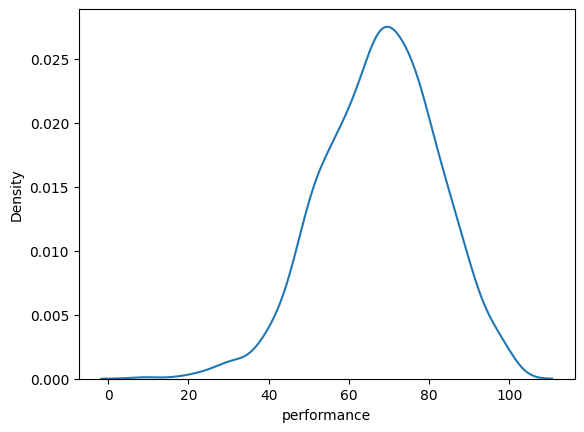

In [ ]:
sns.kdeplot(df['performance'])  # tail on left side--negative skewnes
# mean<median----negative skewnes

In [ ]:
df['performance']=df['performance'].fillna(df['performance'].median())

In [ ]:
df['performance']

,performance
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [ ]:
# skewnes removal
from scipy.stats import skew

In [ ]:
numerical_cols=df.select_dtypes(["int","float"]).columns
for c in numerical_cols:     #check numeric columns
    print(f"{c} : {skew(df[c])}")

math score : -0.278516571914075
reading score : -0.25871569927829347
writing score : -0.28900962452114176
performance : -0.29860834478379217


In [ ]:
print("before skweness removal :",skew(df["performance"]))
df["performance"]=np.log(df["performance"])    #np.log is used to create more normal distribution
print("after skweness removal :",skew(df["performance"]))

before skweness removal : -0.29860834478379217
after skweness removal : -1.5350378589084333


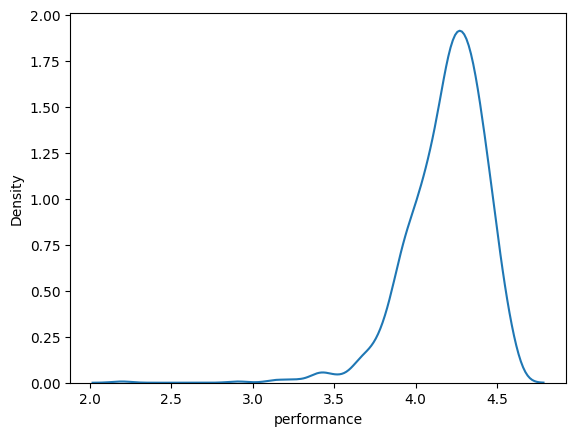

In [ ]:
sns.kdeplot(df['performance'])
plt.show()

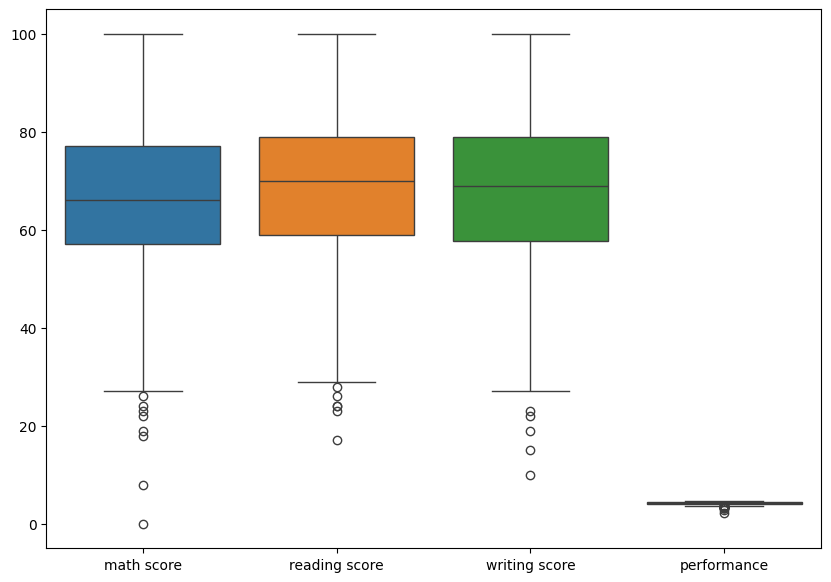

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df)
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px  # since i dont have a client i consider outlier as a important for the dataset that why not removing the outliers
px.box(df,x='performance')

In [ ]:
Q1=df.performance.quantile(0.25)
Q3=df.performance.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound,upper_bound

(3.6367949657921246, 4.781804884360871)

In [ ]:
median_value=df['performance'].median()

In [ ]:
df['performance']=np.where(df['performance']<lower_bound,median_value,df['performance'])
df['performance']=np.where(df['performance']>upper_bound,median_value,df['performance'])

<Axes: xlabel='performance'>

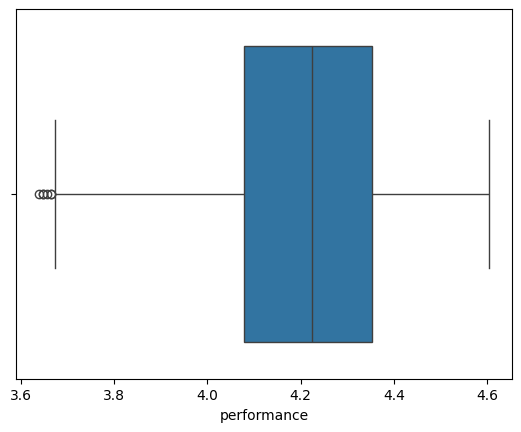

In [ ]:
sns.boxplot(df,x='performance')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features=df[['reading score','writing score']]  # selection of features and target
target=df['performance']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training Data Shape",xtrain.shape,ytrain.shape)
print("Testing Data Shape",xtest.shape,ytest.shape)

Training Data Shape (800, 2) (800,)
Testing Data Shape (200, 2) (200,)


In [ ]:
features.shape  #shows the no. of rows & there columns


(1000, 2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(ypred,ytest)  #
r2=r2_score(ypred,ytest)
print(f"mean_squared_error : {mse}")
print(f"Accurancy of model : {r2}")


mean_squared_error : 0.012459315878916927
Accurancy of model : 0.64508034573531


In [ ]:
lr.score(xtrain,ytrain)

0.830716734375827

In [ ]:
lr.score(xtest,ytest)  # overfitting

0.6802376950464242

In [ ]:
# deal overfitting by regularization (ridge/lasso) and cross validation

In [ ]:
from sklearn.linear_model import Ridge
for i in range(1,51): # hyper parameter tuning
  l_r=Ridge(i)
  l_r.fit(xtrain,ytrain)
  score_train=l_r.score(xtrain,ytrain)
  score_test=l_r.score(xtest,ytest)
  print(f"{i} train : {score_train} test : {score_test}")

1 train : 0.8307167343667284 test : 0.6802381758820576
2 train : 0.8307167343394349 test : 0.6802386567413179
3 train : 0.8307167342939498 test : 0.6802391376241899
4 train : 0.8307167342302764 test : 0.6802396185306587
5 train : 0.830716734148418 test : 0.6802400994607098
6 train : 0.8307167340483779 test : 0.6802405804143288
7 train : 0.8307167339301593 test : 0.6802410613915009
8 train : 0.8307167337937658 test : 0.6802415423922115
9 train : 0.8307167336392004 test : 0.6802420234164459
10 train : 0.8307167334664667 test : 0.6802425044641898
11 train : 0.8307167332755677 test : 0.6802429855354283
12 train : 0.8307167330665068 test : 0.6802434666301471
13 train : 0.8307167328392873 test : 0.6802439477483313
14 train : 0.8307167325939125 test : 0.6802444288899665
15 train : 0.8307167323303859 test : 0.6802449100550383
16 train : 0.8307167320487103 test : 0.680245391243532
17 train : 0.8307167317488893 test : 0.6802458724554328
18 train : 0.8307167314309263 test : 0.6802463536907264
19 

In [ ]:
l_r=Ridge(200)
l_r.fit(xtrain,ytrain)
score_train=l_r.score(xtrain,ytrain)
score_test=l_r.score(xtest,ytest)
print(f"{i} train : {score_train} test : {score_test}")

50 train : 0.8307163746823087 test : 0.680334313530353


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df["performance"].value_counts()

,count
performance,
4.224398,33
4.219508,15
4.348125,14
4.189655,14
4.229264,12
...,...
4.507190,1
4.601831,1
4.510860,1


In [ ]:
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
ypred=model.predict(xtest)
mse=mean_squared_error(ypred,ytest)
r2=r2_score(ypred,ytest)
print(f"mean_squared_error : {mse}")
print(f"Accurancy of model : {r2}")

mean_squared_error : 0.004531770617344062
Accurancy of model : 0.8709496791574074


<Axes: xlabel='performance', ylabel='Density'>

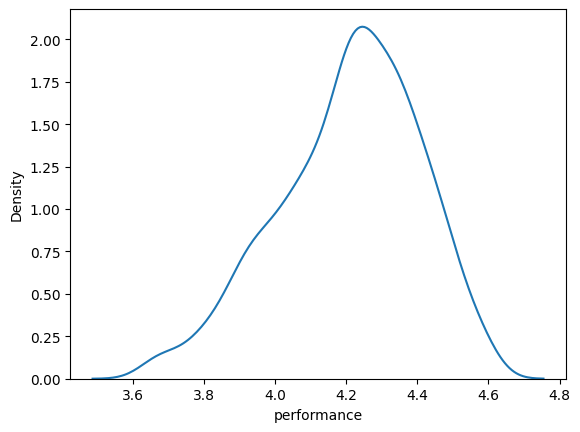

In [ ]:
sns.kdeplot(df['performance'])